In [1]:
import pandas as pd
import seaborn as sns
import calmap
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cdek_border_orders.csv', sep=';')
df

,orderNumber,cityFrom,cityTo,orderDate,weight,status
0,1317629863,Джанкой,Арсеньев,2022-02-21,"0,2",Вручен
1,1317637690,Калачинск,Москва,2022-02-21,2,Вручен
2,1317637989,"Пинск, Брестская обл.",Новосибирск,2022-02-21,"3,1",Вручен
3,1317643082,Новозыбков,Бологое,2022-02-21,"0,8",Вручен
4,1317644111,Каменск-Шахтинский,Оренбург,2022-02-21,"1,5",Вручен
...,...,...,...,...,...,...
66069,1336240833,"Пинск, Брестская обл.",Ярославль,2022-05-20,"0,85",Создан
66070,1336242703,Красный Сулин,Якутск,2022-05-20,"1,3",В пути
66071,1336243254,Красный Сулин,Москва,2022-05-20,1,В пути
66072,1336246880,Каменск-Шахтинский,Санкт-Петербург,2022-05-20,"0,5",Создан


In [3]:
df['weight_num'] = df.weight.apply(lambda x: float(x.replace(',', '.')))
df.weight_num

0        0.20
1        2.00
2        3.10
3        0.80
4        1.50
         ... 
66069    0.85
66070    1.30
66071    1.00
66072    0.50
66073    1.00
Name: weight_num, Length: 66074, dtype: float64

In [4]:
from_list = ['Армянск', 'Богучар', 'Валуйки', 'Джанкой', 'Железногорск', 'Климово', 'Клинцы', 'Мозырь', 'Новозыбков', 'Покровское', 'Россошь', 'Рыльск', 'Унеча']
to_list = ['Абакан', 'Алейск', 'Ангарск', 'Арсеньев', 'Артем', 'Барнаул', 'Белогорск', 'Бердск', 'Березовский', 'Бийск', 'Биробиджан', 'Борзя', 'Буденновск', 'Буйнакск', 'Владивосток', 'Вольск', 'Грозный', 'Гудермес', 'Екатеринбург', 'Железногорск', 'Зеленогорск', 'Златоуст', 'Иваново', 'Искитим', 'Калининград', 'Камышлов', 'Каспийск', 'Кемерово', 'Красноярск', 'Кызыл', 'Кяхта', 'Махачкала', 'Миасс', 'Минеральные Воды', 'Михайловск', 'Невинномысск', 'Новосибирск', 'Омск', 'Оренбург', 'Остров', 'Парголово', 'Псков', 'Рубцовск', 'Самара', 'Североуральск', 'Тобольск', 'Тольятти', 'Топчиха', 'Тоцкое', 'Тула', 'Улан-Удэ', 'Ульяновск', 'Уссурийск', 'Хабаровск', 'Чебаркуль', 'Челябинск', 'Чита', 'Щекино', 'Юрга', 'Ярославль']
len(from_list), len(to_list)


(13, 60)

In [5]:
df.weight_num.describe()

count    66074.000000
mean         5.278671
std         13.088628
min          0.001000
25%          0.500000
50%          1.500000
75%          5.000000
max        500.000000
Name: weight_num, dtype: float64

In [6]:
df_filtered = df[(df.weight_num > 1) & (df.cityFrom.isin(from_list)) & (df.cityTo.isin(to_list))]

In [7]:
df_filtered.weight_num.describe()

count    2429.000000
mean       15.487807
std        19.519322
min         1.020000
25%         3.000000
50%        10.000000
75%        20.170000
max       380.500000
Name: weight_num, dtype: float64

In [8]:
df_filtered[df_filtered.weight_num == 380.5]

,orderNumber,cityFrom,cityTo,orderDate,weight,status,weight_num
29390,1326811163,Рыльск,Березовский,2022-04-02,"380,5",Вручен,380.5


In [9]:
len(set(df_filtered.cityFrom))

10

In [10]:
df_filtered.cityFrom.value_counts()

Клинцы        877
Россошь       416
Новозыбков    406
Джанкой       288
Рыльск        146
Унеча         116
Климово        84
Богучар        68
Покровское     14
Армянск        14
Name: cityFrom, dtype: int64

In [11]:
data = df_filtered.groupby('orderDate').weight_num.sum()
data.index = pd.to_datetime(data.index)
data

orderDate
2022-02-21    120.700
2022-02-22     74.830
2022-02-23     23.540
2022-02-24      1.100
2022-02-25    210.005
               ...   
2022-05-16    505.490
2022-05-17    178.566
2022-05-18    110.200
2022-05-19    111.253
2022-05-20    284.950
Name: weight_num, Length: 88, dtype: float64

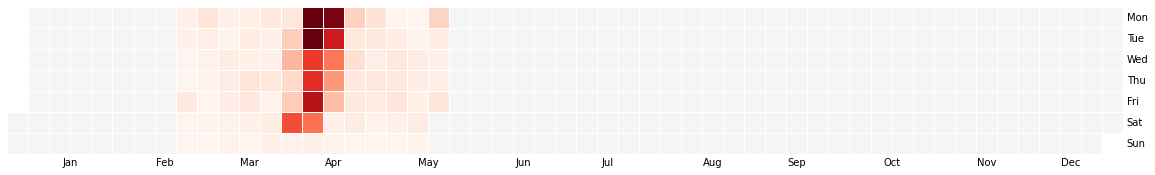

In [12]:
plt.figure(figsize=(20, 20))
calmap.yearplot(data, year=2022)
#cmap='YlGn', fillcolor='grey'
plt.show()

/var/folders/p2/tgvyp6f51vjb5bfrp45srwk00000gp/T/ipykernel_44184/229552528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = pd.to_datetime(df_filtered['orderDate']).dt.day_name()


<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

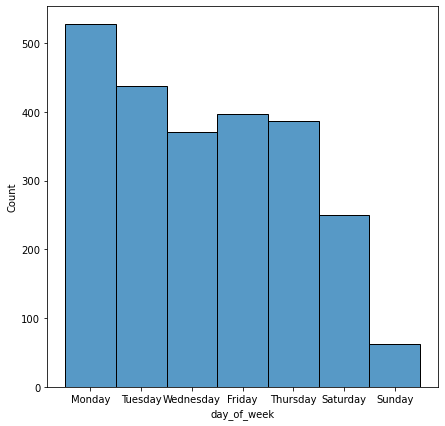

In [13]:
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['orderDate']).dt.day_name()

plt.figure(figsize=(7, 7))
sns.histplot(df_filtered['day_of_week'])